### 2.1.1 太阳的纬度(Declination of the Sun)

在冬至或者是夏至日(solstice)，太阳光与地球赤道的夹角达到最大值$23^{\circ}44'$. 所以在北半球，夏至日的$\delta_{\odot}=23^{\circ}44'$, 冬至日$\delta_{\odot}=-23^{\circ}44'$. 在春分或秋分(equinox)点，太阳通过天赤道，所以$\delta_{\odot}=0^{\circ}$.

太阳在任意时刻的纬度可以用下面的公式计算
$\delta_{\odot}=\arcsin[\sin(-23.44^{\circ})\cdot\sin(EL)]$
其中$EL$是ecliptic longitude (黄道经度，地球在轨道上的位置)。因为地球轨道是椭圆，用圆近似会产生$1^{\circ}$的误差. 圆近似意味着地球在春分点的位置比夏至日小$90^{\circ}$。 所以$\sin(EL)$可以写成$\sin(90+NDS)=\cos(NDS)$, 其中$NDS$是12月冬至日之后的天数

$\delta_{\odot}=-\arcsin\left[\sin\epsilon_0\cos\left(\frac{360^{\circ}}{365.24}(N+10)\right)\right]$

进一步可以将$\arcsin[\sin(d)\cdot\cos(NDS)$近似为$d\cdot\cos(NDS)$， 就得到下面的常用公式：

$\delta_{\odot}=-23.44^{\circ}\cdot\cos\left[\frac{360^{\circ}}{365.24}\cdot(N+10)\right]$

其中$N$是一年中距离1月1日的天数, $N=0$是Universal Time (UT) 1月1日午夜。10是1月1日到12月夏至日时间差的一个近似值。

计算误差分析：
这个公式计算的倾角在9月秋分点时误差为$+1.5^{\circ}$.
1. 正弦函数近似导致$0.26^{\circ}$的误差
2. 选择午夜作为一天的开始时刻


更精确的计算方法是不采用上面两个近似，以及采用地球轨道参数估计EL:

$\delta_{\odot}=-\arcsin\left[\sin\epsilon_0\cos\left(\frac{360^{\circ}}{365.24}(N+10)+\frac{360^{\circ}}{\pi}\cdot 0.0167\sin\left(\frac{360^{\circ}}{365.24}(N-2)\right)\right)\right]$

$N$是距离1月1日午夜的天数，$(N-2)$中的2是1月1日到地球近日点之间相差的天数的近似值. 0.0167是地球轨道的椭率，它变化很缓慢，可视为常数。这个公式的最大误差是$\pm0.2^{\circ}$, 如果可以把$(N+10)$中的10调整为夏至日到$N=0$的更准确的值，其误差可以小于$\pm0.03^{\circ}$.

In [3]:
import numpy as np

N = np.array([80,266,172,355]) # day of 1st solstice

omega = 360/365.24 # angular velocity in rad/day

ecl = 23.44 # obliquity of the ecliptic

# approximate expression for declination of the Sun

delta = -ecl*np.cos(np.radians(omega)*(N+10))
for each in delta:
    print("declination = {:.2f} deg".format(each))

declination = -0.53 deg
declination = -0.83 deg
declination = 23.44 deg
declination = -23.44 deg


In [2]:
import numpy as np

N = 171 # day of 1st solstice

omega = 2*np.pi/365.24 # angular velocity in rad/day

ecl = np.radians(23.44) # obliquity of the ecliptic

# approximate expression for declination of the Sun

delta = -np.arcsin(np.sin(ecl)*np.cos(omega*(N+10)))

print("declination = {:.2f} deg".format(np.degrees(delta)))

declination = 23.43 deg


### 2.1.2 日周弧的定义
Diurnal Arc指的是在天文学中，某一个天体（如恒星、太阳或其他天体）在天球上相对于观测者的地平线，由升起到落下所经过的视路径。根据观测者所在地点的纬度以及观测对象在天球上的赤纬，日周弧的长度和形状会有所不同。日周弧越大，意味着天体在地平线上方可见的时间越长。

<img src="DiurnalArc.png" width=400>
展示了一个恒星在天球上的日弧（粗红圈）在水平坐标系中围绕观测者（纬度φ）的运动。由于赤道平面相对于水平平面倾斜的角度是90° - φ，恒星在子午线的最高点（上中天）的高度$a_{\rm max}$由$a_{\rm max}$ = 90° - φ + δ给出，其中δ是恒星的赤纬。在与地球自转同步的坐标系中，恒星在小时角hrise时刻升起，当它穿过子午线时（h = 0）达到最高高度，然后在小时角$h_{\rm set} = -h_{\rm rise}$时刻在地平线上落下。

#### 日周弧的计算公式
$$\cos h_{\rm set} = -\tan\delta\tan\phi$$
其中$\delta$是天体的赤纬，$\phi$是观测地点的纬度。

上述公式基于天体赤纬和观测地点的纬度之间的关系来计算日周弧的长度或角度。该公式可用于天文学中描述不同地点、不同天体的日周运动，具有一定的实用性和理论意义。

In [28]:
import astropy
from astropy.coordinates import SkyCoord,EarthLocation
#获得天体Betelgeuse的信息
betelgeuse =SkyCoord .from_name('Betelgeuse')
print(betelgeuse)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>


In [29]:
betelgeuse.dec

<Latitude 7.40706399 deg>

In [30]:
import astropy.units as u 
# geographical position of the observer 观察者的地理纬度
obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec, lon=10*u.deg+14*u.arcmin+23*u.arcsec) #Hamburg Observatory
# get latitude 
phi = obs.lat

计算$h$

In [31]:
import math 
delta = betelgeuse.dec
#计算的时候角度要转化成弧度
h = math.acos(-math.tan(delta.radian)*math.tan(phi.radian))

为获得天体的日周弧$T$, 需要注意的是sidereal day和solar day的区别：
1. sidereal day (恒星日): 指地球自转一周，使得同一颗遥远的恒星连续两次经过当地子午面（即从地平线升起到再次出现在子午线上）的时间间隔。这个时间周期大约是23小时56分4秒。恒星日是以恒星为参考系，是地球自转360度的周期。
2. solar day (太阳日): 也就是我们通常所说的一天，它是太阳连续两次经过同一地点子午面的时间间隔，大约是24小时。太阳日比恒星日长，这是因为地球在自转的同时还在绕太阳公转，所以太阳相对于地球的位置每天会稍微前移一点，导致太阳日比恒星日长大约4分钟.

可以用astropy.units模块进行二者的转换

In [32]:
T =(math.degrees(2*h)/360)*u.sday #u.sday 恒星日
print("T = {:.2f}".format(T.to(u.h))) #u.h, 太阳时

T = 13.31 h


### 2.1.3 Observation of Celestial Objects

### 练习2.1 计算太阳的纬度

太阳的纬度$\delta_{\odot}$可以用如下公式近似计算

$\delta_{\odot}=-23.44^{\circ}\cdot\cos\left[\frac{360^{\circ}}{365.24}\cdot(N+10)\right]$

其中$N$是一年中距离1月1日的天数, $N=0$是Universal Time (UT) 1月1日午夜。10是1月1日到12月夏至日时间差的一个近似值。

使用math模块中的三角函数，注意角度和弧度的转换. 
分别用for循环和Numpy数组矢量运算计算春分、秋分和夏至、冬至时太阳的赤纬。打印结果，并检查它们的值是否一致。

### 行星运动的开普勒第三定律

按照开普勒第三定律，行星运动的周期$P$和其绕中心恒星运动的椭圆轨道的半长轴$a$有如下关系：

$$P^2 = \frac{4\pi^2}{G(M+m)}a^3$$

其中$a$是轨道的半长轴，$G$是引力常数，$M$是恒星的质量，$m$是行星的质量。
从
https://nssdc.gsfc.nasa.gov/planetary/factsheet/
查出太阳系内八大行星的质量, 并用上面的公式计算周期。并将周期$P$和轨道半长轴$a$的关系画在一个双对数坐标上，此时，二者关系应该是一条直线。

提示：

70.95038502035464
69.46818520769537
52.10593073970458
95.7802563594277
66.26066477594483
21.839066099214605
68.1797817071447
72.08317327682049
{'Mercury': 581.6841439043584, 'Venus': 429.65704386437534, 'Earth': 265.88697281752434, 'Mars': 890.6795945975618, 'Jupiter': 30.199923808767537, 'saturn': 10.402671363366776, 'Uranus': 142.95484568843224, 'Neptune': 143.8112558231431}


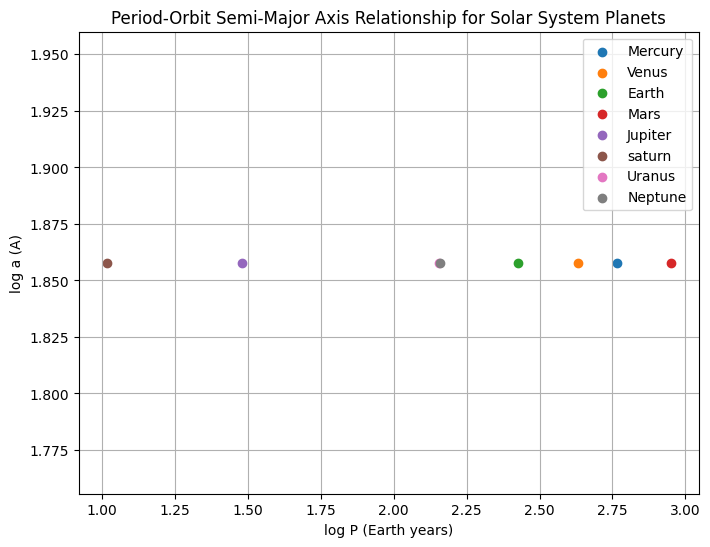

In [27]:
import numpy as np, matplotlib.pyplot as plt
#太阳系内八大行星的质量数据（以地球质量为单位）
planet_masses = {
'Mercury': 0.055,
'Venus': 0.815,
'Earth': 1.0,
'Mars': 0.107,
'Jupiter': 317.8,
'saturn': 95.2,
'Uranus': 14.5,
'Neptune': 17.1
}

#引力常数 G，单位：天文单位^3／地球质量／天^2
G = 39.5
#计算每个行星的周期P（以地球年为单位）
periods = {}
for planet, mass in planet_masses.items():
    a = np.random.uniform(0.1,100) # 随机生成轨道半长轴a的值（模拟数据）
    print(a)
    P = np.sqrt((4 * np.pi**2 * a**3)/(G * (1 + mass))) # 计算周期p
    periods[planet] = P

print(periods)
#绘制周期P和轨道半长轴a的关系图（双对数坐标）
plt.figure(figsize=(8, 6))
for planet, P in periods.items():
    plt.scatter(np.log10(P), np.log10(a), label=planet)
plt.xlabel('log P (Earth years)')
plt.ylabel('log a (A)')
plt.title('Period-Orbit Semi-Major Axis Relationship for Solar System Planets')
plt.legend()
plt.grid(True)
plt.show()

从网上直接复制原始数据

In [5]:
#data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/
p_ori = "MERCURY 	 VENUS 	 EARTH  	 MARS 	 JUPITER 	 SATURN 	 URANUS 	 NEPTUNE" 
M_ori ="0.330	4.87	5.97		0.642	1898	568	86.8	102"  #10^{24} kg
a_ori = "57.9	108.2	149.6		228.0	778.5	1432.0	2867.0	4515.0"  #10^6 km

将原始数据转成需要的格式

In [6]:
planet = p_ori.split()
mass = np.array([float(m)*1e24 for m in M_ori.split()])
a = np.array([float(each)*1e9 for each in a_ori.split()])

In [8]:
planet,mass,a

(['MERCURY',
  'VENUS',
  'EARTH',
  'MARS',
  'JUPITER',
  'SATURN',
  'URANUS',
  'NEPTUNE'],
 array([3.300e+23, 4.870e+24, 5.970e+24, 6.420e+23, 1.898e+27, 5.680e+26,
        8.680e+25, 1.020e+26]),
 array([5.790e+10, 1.082e+11, 1.496e+11, 2.280e+11, 7.785e+11, 1.432e+12,
        2.867e+12, 4.515e+12]))

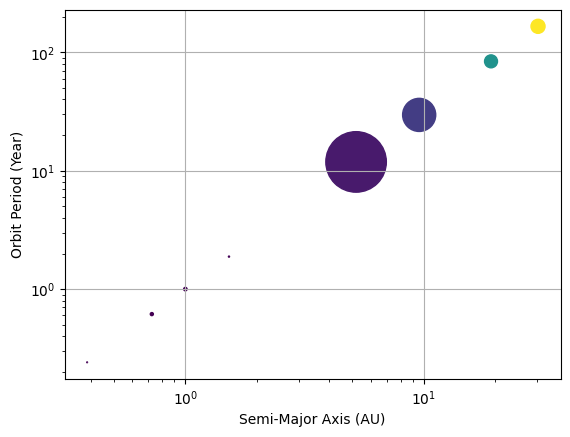

In [17]:
import numpy as np, matplotlib.pyplot as plt
from astropy.constants import G, M_sun, au #万有引力常数(m^3/kg/s^2)，太阳质量(kg)，天文单位(m)
planet = ['MERCURY', 'VENUS', 'EARTH', 'MARS', 'JUPITER', 'SATURN', 'URANUS', 'NEPTUNE']
mass = np.array([0.330,4.87,5.97,0.642,1898,568,86.8,102]) #10^{24} kg
a = np.array([57.9,108.2,149.6,228.0,778.5,1432.0,2867.0,4515.0]) #10^6 km

P = np.sqrt(4*np.pi**2/G.value/(M_sun.value+mass*1e24)*(a*1e9)**3)

plt.scatter(a*1e9/au.value,P/86400/365, s=mass, c=P)
plt.loglog()
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbit Period (Year)')
plt.grid()

按照开普勒第三定律的公式，

$P^2=\frac{4\pi^2}{G(M+m)}a^3$

我们现在已经用了$a$和$m$, 还需要万有引力常数$G$和太阳质量$M$, 这两个数值可以直接从网上查出赋值，也可以从库里找到

In [29]:
from astropy.constants import G, M_sun, au #万有引力常数(m^3/kg/s^2)，太阳质量(kg)，天文单位(m)

In [68]:
print(G.value,M_sun.value)

6.6743e-11 1.988409870698051e+30


In [76]:
P = np.sqrt(4*np.pi**2/G.value/(M_sun.value+mass)*a**3)

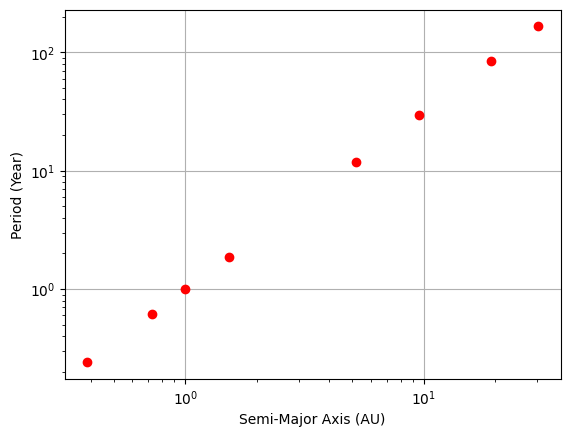

In [82]:
import astropy.units as u
#画图的时候半长轴取AU为单位，周期取恒星日为单位
plt.loglog(a*u.meter.to(u.au),P*u.second.to(u.year),'ro')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Period (Year)')
plt.grid()

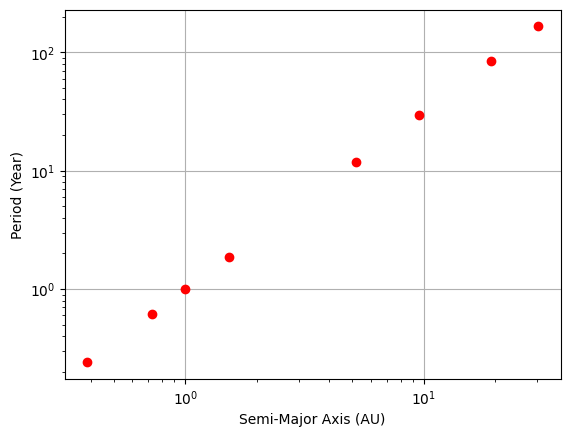

In [31]:
import pandas as pd
from astropy.constants import G, M_sun, au #万有引力常数(m^3/kg/s^2)，太阳质量(kg)，天文单位(m)
import astropy.units as u

# The data is stored in multiple tables on the webpage. Let's fetch all of them.
tables = pd.read_html("https://nssdc.gsfc.nasa.gov/planetary/factsheet",header=0,index_col=0, skiprows=[19,20,21])
info = tables[0].T #表格行列转换

planet = info.drop(['MOON','PLUTO']) #去掉非太阳系内行星


m = planet['Mass (1024kg)'].astype(float)
a = planet['Distance from Sun (106 km)'].astype(float)

P = np.sqrt(4*np.pi**2/G/(M_sun+m*1e24)*(a*1e9)**3) #开普勒第三定律

#画图的时候半长轴取AU为单位，周期取恒星日为单位
plt.loglog(a*1e9*u.meter.to(u.au),P*u.second.to(u.year),'ro')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Period (Year)')
plt.grid()